In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.target[0]

0

In [6]:
digits.feature_names[0]

'pixel_0_0'

<Figure size 432x288 with 0 Axes>

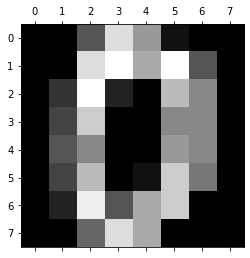

In [10]:
plt.gray()
plt.matshow(digits.images[0])

In [11]:
digits.target_names[0]

0

<Figure size 432x288 with 0 Axes>

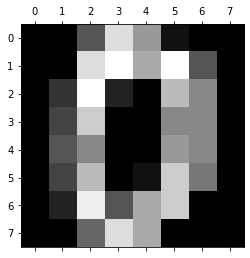

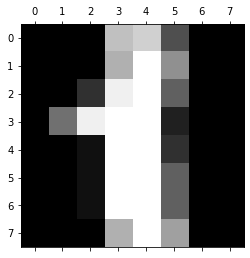

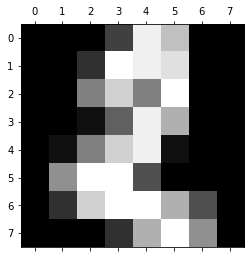

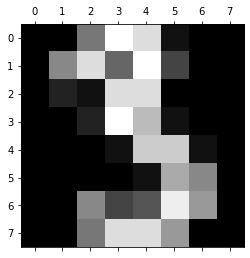

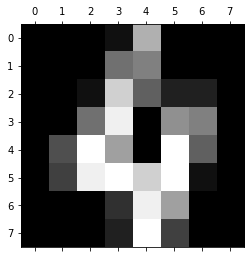

In [13]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [14]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [24]:
X_train.shape

(1437, 64)

In [26]:
model.score(X_test, y_test)

0.9611111111111111

In [27]:
model.predict([digits.data[65]])

array([6])

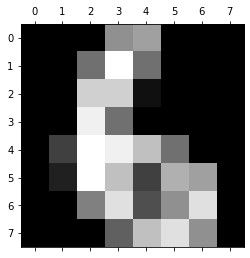

In [28]:
plt.matshow(digits.images[65])

In [29]:
digits.target[65]

6

In [33]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [34]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_predicted)
conf

array([[29,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  1,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]], dtype=int64)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Text(69.0, 0.5, 'truth')

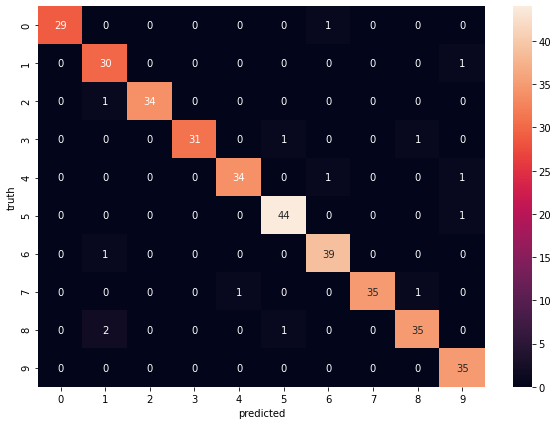

In [35]:
import seaborn as sn 
plt.figure(figsize= (10, 7))
sn.heatmap(conf, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")